<a href="https://colab.research.google.com/github/Kushagratandon12/Intel_Image-Classification/blob/master/iNTEL_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection From Kaggle

In [1]:
# !pip install kaggle
# # # from google.colab import files
# # # files.upload()
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d puneet6060/intel-image-classification

#####NOTES ON 
# https://www.notion.so/TensorFlow-2-O-Notes-ff1463fb14f54affa0d4e4390c1152dc

In [2]:
#UNZIP THE DATA DOWNLOADED FROM KAGGLE 
# import zipfile
# local_zip = '/content/intel-image-classification.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Image Pre-Processing


In [4]:
train_path = '/content/seg_train/seg_train'
test_path = '/content/seg_test/seg_test'
pred_path = '/content/seg_pred/seg_pred'

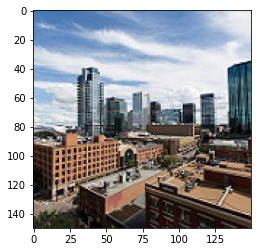

In [5]:
import matplotlib.pyplot as plt
img1 = plt.imread('/content/seg_train/seg_train/buildings/10006.jpg')
plt.imshow(img1)

# Image Data Generator - Keras

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
train_df = keras.preprocessing.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size=(160,160), 
)

Found 14034 files belonging to 6 classes.


In [8]:
#Total Number Of Classes In The System
classes = train_df.class_names
print(classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


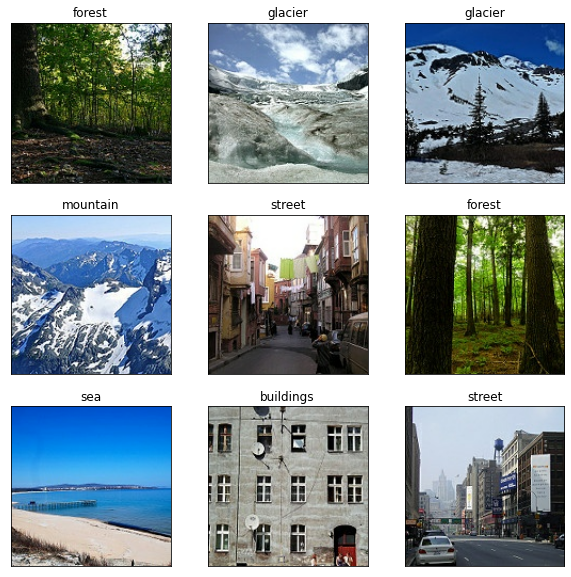

In [9]:
plt.figure(figsize=(10,10))

for images, labels in train_df.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i]/255) 
    plt.title(classes[labels[i]])
    plt.xticks([])
    plt.yticks([])

# IMAGE AGUMENTATION

In [10]:
TRAINING_DIR = '/content/seg_train/seg_train'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range=0.2,
    zoom_range = 0.2
)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(160, 160))

Found 14034 images belonging to 6 classes.


In [11]:
VALIDATION_DIR = '/content/seg_test/seg_test'
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(160, 160))

Found 3000 images belonging to 6 classes.


# Creation / Using Of Model

In [12]:
#SELF MADE MODEL
"""
import tensorflow as tf
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
model = Models.Sequential()
model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
"""

"\nimport tensorflow as tf\nimport tensorflow.keras.optimizers as Optimizer\nimport tensorflow.keras.layers as Layers\nimport tensorflow.keras.activations as Actications\nimport tensorflow.keras.models as Models\nmodel = Models.Sequential()\nmodel.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))\nmodel.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))\nmodel.add(Layers.MaxPool2D(5,5))\nmodel.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))\nmodel.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))\nmodel.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))\nmodel.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))\nmodel.add(Layers.MaxPool2D(5,5))\nmodel.add(Layers.Flatten())\nmodel.add(Layers.Dense(180,activation='relu'))\nmodel.add(Layers.Dense(100,activation='relu'))\nmodel.add(Layers.Dense(50,activation='relu'))\nmodel.add(Layers.Dropout(rate=0.5))\nmodel.add(Layers.Dense(6,activation='softmax'))\nmodel.c

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2,InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os

In [14]:
BATCH_SIZE = 32
IMG_HEIGHT = 160
IMG_WIDTH = 160
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
EPOCHS = 10
INIT_LR = 1e-3

CLASS_NAMES = np.array([item for item in os.listdir(train_path)])
print (CLASS_NAMES)

['sea' 'forest' 'street' 'mountain' 'buildings' 'glacier']


In [15]:
def define_model(n_layers=150,BASE_MODEL='ResNet50V2'):
    if BASE_MODEL =='ResNet50V2':
        # Pre-trained model with MobileNetV2
        base_model = ResNet50V2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=False
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.2)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)
    
    if BASE_MODEL =='InceptionV3':
        base_model = InceptionV3(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=False
        
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.5)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)
    return model

# define Model 
model= define_model(BASE_MODEL='InceptionV3')

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(lr=0.01), 
    metrics=['accuracy'])

In [16]:
#Last Layer Was Enabled Using My Developed Model
#model.summary()

In [17]:
history = model.fit(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/25
702/702 [==============================] - 119s 159ms/step - loss: 6.6225 - accuracy: 0.2157 - val_loss: 1.1875 - val_accuracy: 0.4560
Epoch 2/25
702/702 [==============================] - 109s 155ms/step - loss: 1.0546 - accuracy: 0.5194 - val_loss: 0.8212 - val_accuracy: 0.6193
Epoch 3/25
702/702 [==============================] - 110s 157ms/step - loss: 0.8846 - accuracy: 0.6082 - val_loss: 0.8260 - val_accuracy: 0.6643
Epoch 4/25
702/702 [==============================] - 109s 155ms/step - loss: 0.7678 - accuracy: 0.6864 - val_loss: 0.5201 - val_accuracy: 0.8127
Epoch 5/25
702/702 [==============================] - 109s 155ms/step - loss: 0.7294 - accuracy: 0.7448 - val_loss: 0.5789 - val_accuracy: 0.8073
Epoch 6/25
702/702 [==============================] - 109s 155ms/step - loss: 0.5814 - accuracy: 0.7948 - val_loss: 0.5383 - val_accuracy: 0.8067
Epoch 7/25
702/702 [==============================] - 108s 154ms/step - loss: 0.5171 - accuracy: 0.8209 - val_loss: 0.3926 -

In [18]:
tf.saved_model.save(model,'intel_model')

INFO:tensorflow:Assets written to: intel_model/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/intel_model') # path to the SavedModel directory
tflite_model = converter.convert()

with open('tflite_model','wb') as file:
  file.write(tflite_model)

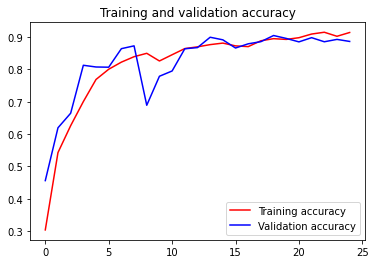

<Figure size 432x288 with 0 Axes>

In [20]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<class 'list'>


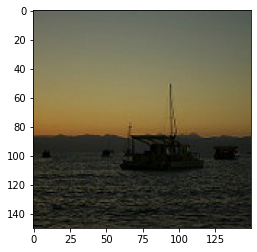

In [57]:
import glob
import random
test_img = glob.glob('/content/seg_pred/seg_pred/*.jpg')
img_select = random.randint(1,len(test_img))
print(type(test_img))
img = plt.imread(test_img[img_select])
plt.imshow(img)

#Using TENSORFLOW LITE 


In [58]:
import numpy as np
import tensorflow as tf
import cv2

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/tflite_model")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [60]:
img = cv2.resize(img,(160,160))
img=img/255.0

In [61]:
# Test model on input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.expand_dims(img,axis=0), dtype=np.float32)
print(input_data.shape)
print(input_data.dtype)

interpreter.set_tensor(input_details[0]['index'], input_data)

# Model predict
interpreter.invoke()
output_details = interpreter.get_output_details()
# time to predict 
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)
pred = np.argmax(results)
print(pred)

(1, 160, 160, 3)
float32
4


In [62]:
print(classes[pred])

sea
